# Exploratory Data Analysis for Super Market Sales Data

Exploratory Data Analysis (EDA) is a kind to being a detective for data. It involves thoroughly examining and understanding a dataset before diving into model building or decision-making processes. 
Similar to exploring a new place, EDA entails searching for clues, patterns, and insights within the data to make informed decisions. This initial exploration is crucial as it helps uncover important aspects, identify trends, and detect potential issues, laying the foundation for effective data-driven decision-making.

Imports and reading data 

In [1]:
# Importing Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [56]:
# reading the data 
market_df = pd.read_csv("/users/pc/Desktop/supermarket_sales.csv")

Variable Description:- 
1. Invoice ID :-  A unique identifier for each invoice or transaction.
2. Branch:- The branch or location where the transaction occurred.
3. City:- The city where the branch is located.
4. Customer Type:- Indicates whether the customer is a regular or new customer.
5. Gender:- The gender of the customer.
6. Product Line:- The category or type of product purchased.
7. Unit Price:- The price of a single unit of the product.
8. Quantity:- The number of units of the product purchased.
9. Tax 5%:- The amount of tax (5% of the total cost) applied to the transaction.
10. Total:- The total cost of the transaction, including tax.
11. Date:- The date when the transaction took place.
12. Time:- The time of day when the transaction occurred.
13. Payment:- The payment method used (e.g., credit card, cash).
14. COGS (Cost of Goods Sold):- The direct costs associated with producing or purchasing the products sold.
15. Gross Margin Percentage:- The profit margin percentage for the transaction.
16. Gross Income:- The total profit earned from the transaction.
17. Rating:- Customer satisfaction rating or feedback on the transaction.
18. For instance, if we were interested in predicting customer satisfaction, Rating might be considered. If we were trying to predict sales or revenue, Total or Gross Income could be considered.

# Data Cleaning and Preparation

Before analyzing the data, it is important to us to clean and prepare the data. 
The methods used to clean and prepare the data are as listed below:

1. Changing Data Types of Columns from object to Floats and integers
2. Filling in Missing Information
3. Checking For Duplicate Rows
4. Creating Various New Columns

# Data Understanding

1. Data frame shape
2. Head and tail
3. Describe
4. Info

In [57]:
market_df.shape

(1000, 17)

In [58]:
market_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [59]:
market_df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


# We have object, int and float datatypes and there are no null values here

In [60]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [61]:
market_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


# Data Preparation

1. Column names and datatypes
2. Dropping irrelevant columns and rows 
3. Identifying Duplicated columns 
4. Renaming Columns

In [62]:
market_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

Verify data types of each column and convert them if needed 
(convert numerical columns to appropriate numeric types).
But here in the dataset the datatypes are in appropriate way

In [63]:
market_df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

# There is no null values in any of columns 

In [64]:
market_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Now i am dropping the Invpice id, Date and Time columns from market_df

In [65]:
market_df = market_df.drop(['Invoice ID','Date','Time'],axis = 1)

In [66]:
market_df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1


In [67]:
# checking if there any duplicates
market_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [68]:
# dropping duplicates if there are any
market_df.drop_duplicates()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1


# Renaming the column cogs to cost of goods sold and total to total amount

In [69]:
# Renaming the 'cogs' column to 'cost of goods sold'
market_df.rename(columns={'cogs': 'cost of goods sold'}, inplace=True)

# Renaming the 'total' column to 'total amount'
market_df.rename(columns={'Total': 'Total amount'}, inplace=True)

In [70]:
market_df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total amount,Payment,cost of goods sold,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1


# Creating a new column for profit

In [71]:
market_df['Profit'] = market_df['Total amount'] - market_df['cost of goods sold']

# Display the updated DataFrame
market_df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total amount,Payment,cost of goods sold,gross margin percentage,gross income,Rating,Profit
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,26.1415
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,3.8200
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,16.2155
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,23.2880
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,30.2085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2,2.0175
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4,48.6900
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7,1.5920
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1,3.2910


# Initial Data Analysis

# Total number of records in the dataset

In [200]:
total_records = len(market_df)
total_records

1000

# Unique cities are present in the dataset

In [201]:
unique_cities = market_df['City'].nunique()
unique_cities

3

# Unique product lines available in the dataset

In [203]:
unique_product_lines = market_df['Product line'].unique()
unique_product_lines

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

# Unique customer types are there

In [206]:
unique_customer_types = market_df['Customer type'].nunique()
unique_customer_types

2

In [302]:
# Average rating

In [301]:
average = market_df['Rating'].mean()
average

6.9727

In [305]:
# max and min rating
max_rating = market_df['Rating'].max()
min_rating = market_df['Rating'].min()
min_rating

4.0

In [306]:
max_rating

10.0

# Listing the number of customers for each customer type

In [72]:
market_df['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

# Number of customers per each branch

In [74]:
market_df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

# Number of customers per each city

In [75]:
market_df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

# Number of products per each product line

In [76]:
market_df['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

# Number of payments for each payment mode

In [77]:
market_df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

In [78]:
market_df['Rating'].value_counts()

Rating
6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: count, Length: 61, dtype: int64

# Defining the rating categories and corresponding ranges based on the provided distribution

In [79]:
bins = [0, 5, 7, 10]
labels = ['Low', 'Medium', 'High']

# Creating a new column 'Rating Category' based on the defined ranges
market_df['Rating Category'] = pd.cut(market_df['Rating'], bins=bins, labels=labels, include_lowest=True)

market_df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total amount,Payment,cost of goods sold,gross margin percentage,gross income,Rating,Profit,Rating Category
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,26.1415,High
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,3.8200,High
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,16.2155,High
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,23.2880,High
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,30.2085,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2,2.0175,Medium
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4,48.6900,Low
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7,1.5920,High
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1,3.2910,Low


# Data Visualization using Seaborn and Matplotlib

# Total revenue generated per each branch

In [80]:
branch_revenue = market_df.groupby('Branch')['Total amount'].sum().reset_index()

Data visualization using piechart

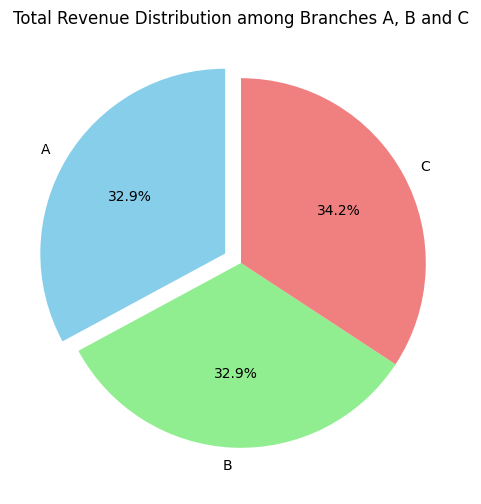

In [81]:
branch_revenue = market_df.groupby('Branch')['Total amount'].sum().reset_index()
explode_values = (0.1, 0, 0)  # This will explode the first slice (Branch A)

# Creating a pie chart
plt.figure(figsize=(6, 6))
plt.pie(branch_revenue['Total amount'], labels=branch_revenue['Branch'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'], explode=explode_values)

plt.title('Total Revenue Distribution among Branches A, B and C')

# Show the pie chart
plt.show()

# Calculating the total revenue like total amount generated and total Sales like total quantity of products sold per each branch 

In [82]:
# Group by 'Branch' and calculate summary statistics
branch_summary = market_df.groupby('Branch').agg({
    'Total amount': 'sum',
    'Quantity': 'sum'
}).reset_index()
print(branch_summary)

  Branch  Total amount  Quantity
0      A   106200.3705      1859
1      B   106197.6720      1820
2      C   110568.7065      1831


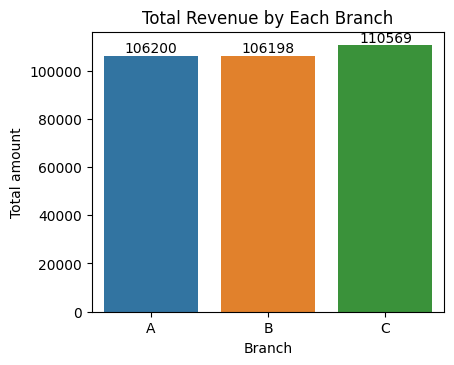

In [98]:
plt.figure(figsize=(10, 8))

# Bar plot for Total amount
plt.subplot(2, 2, 1)
ax = sns.barplot(x='Branch', y='Total amount',hue ='Branch', data=branch_summary)
plt.title('Total Revenue by Each Branch')

for bars in ax.containers:
    ax.bar_label(bars)


Insights:- Branch C outperforms in income generation

# total sales per each branch

In [94]:
branch_revenue = market_df.groupby('Branch')['Quantity'].sum().reset_index()
branch_revenue

,Branch,Quantity
0,A,1859
1,B,1820
2,C,1831


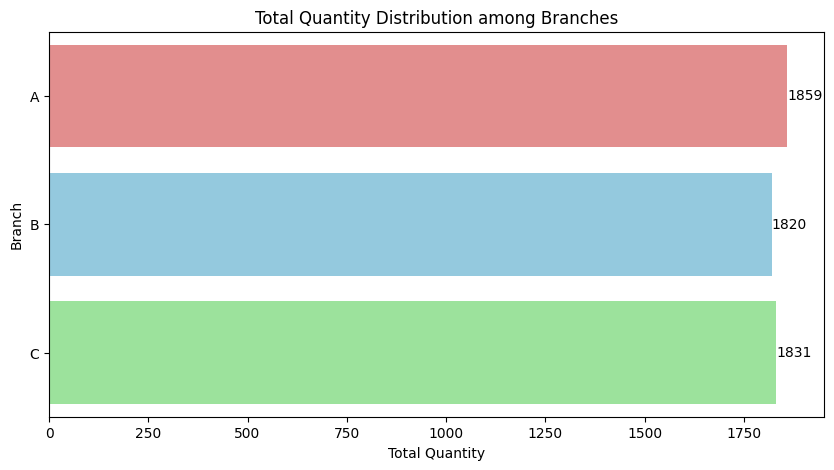

In [97]:
branch_revenue = market_df.groupby('Branch')['Quantity'].sum().reset_index()
branch_revenue

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Quantity', y='Branch', data=branch_revenue, hue = 'Quantity', legend = False, palette=['skyblue', 'lightgreen', 'lightcoral'], orient='h')

# Set chart title and labels
plt.title('Total Quantity Distribution among Branches')
plt.xlabel('Total Quantity')
plt.ylabel('Branch')

for bars in ax.containers:
    ax.bar_label(bars)

# Show the horizontal bar chart
plt.show()

Insights :- While Branch C leads in terms of revenue generation with higher sales, Branch A stands out for processing the highest quantity of orders, indicating a strong distribution of products.

# Payment modes per each branch

In [99]:
payment = market_df.groupby('Branch')['Payment'].sum().reset_index()
payment 


,Branch,Payment
0,A,EwalletCredit cardEwalletEwalletEwalletCredit ...
1,B,Credit cardEwalletCashCashEwalletEwalletCredit...
2,C,CashEwalletEwalletEwalletEwalletEwalletEwallet...


# Create a countplot for payment modes distribution among branches 

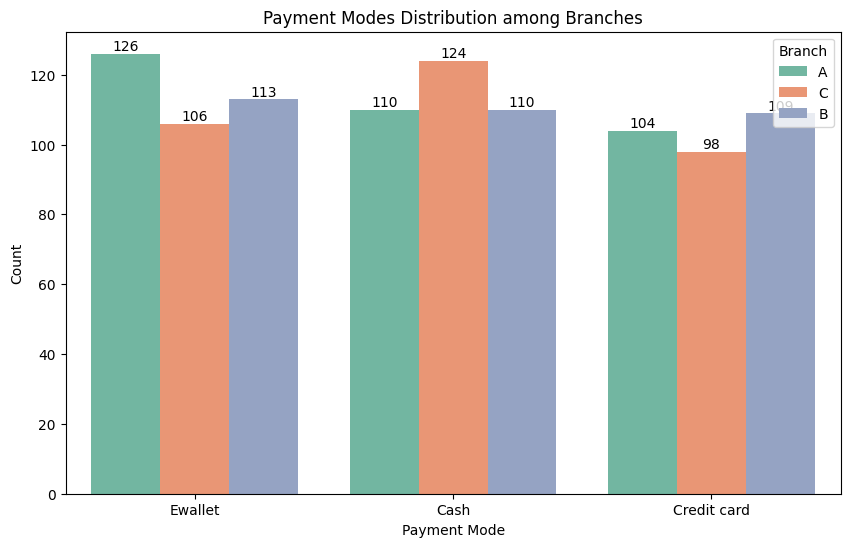

In [100]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Payment', hue='Branch', data=market_df,legend = True, palette='Set2')

# Set chart title and labels
plt.title('Payment Modes Distribution among Branches')
plt.xlabel('Payment Mode')
plt.ylabel('Count')

for bars in ax.containers:
    ax.bar_label(bars)

# Show the countplot
plt.show()

Insights :- In Branch A, the predominant payment method is Ewallet, while in Branch B, Ewallet is also the most commonly used payment mode. On the other hand, in Branch C, cash transactions take the lead. This highlights a slight variation in payment preferences across the branches.

# Summary statistics for each city

# Group by 'City' and calculate summary statistics

In [27]:
city_summary = market_df.groupby('City').agg({
    'Total amount': 'sum',
    'Rating': 'mean',
    'Quantity': 'sum'
}).reset_index()

# Display the summary statistics for each city
print("Summary statistics for each city:")
print(city_summary)

Summary statistics for each city:
        City  Total amount    Rating  Quantity
0   Mandalay   106197.6720  6.818072      1820
1  Naypyitaw   110568.7065  7.072866      1831
2     Yangon   106200.3705  7.027059      1859


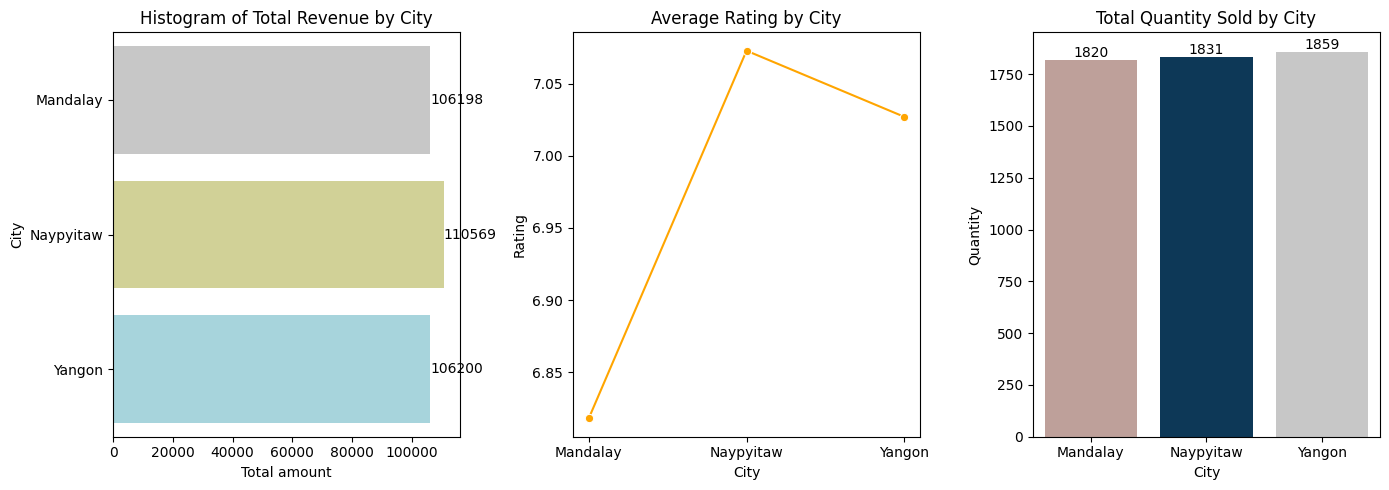

In [118]:
# barplot for Total amount by City
color = ["#c7c7c7", "#dbdb8d", "#9edae5"]
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
ax1 = sns.barplot(x='Total amount', y = 'City', hue='City',data=city_summary,palette = color)
plt.title('Histogram of Total Revenue by City')

for bars in ax1.containers:
    ax1.bar_label(bars)

# Line plot for Rating by City
plt.subplot(1, 3, 2)
sns.lineplot(x='City', y='Rating', data=city_summary, marker='o', color='orange')
plt.title('Average Rating by City')


# Bar plot for Quantity by City
plt.subplot(1, 3, 3)
color = ["#c49c94", "#013a63", "#c7c7c7"]
ax = sns.barplot(x='City', y='Quantity', hue = 'City',data=city_summary,palette = color)
plt.title('Total Quantity Sold by City')
for bars in ax.containers:
    ax.bar_label(bars)

plt.tight_layout()
plt.show()

Insights :- Naypyitaw city leads in revenue generation and receives the highest ratings, while Yangon city records the highest quantity sold or more orders.

# Gross income or Profit generated per each city

In [121]:
profit = market_df.groupby('City')['gross income'].sum().reset_index()
profit

,City,gross income
0,Mandalay,5057.0320
1,Naypyitaw,5265.1765
2,Yangon,5057.1605


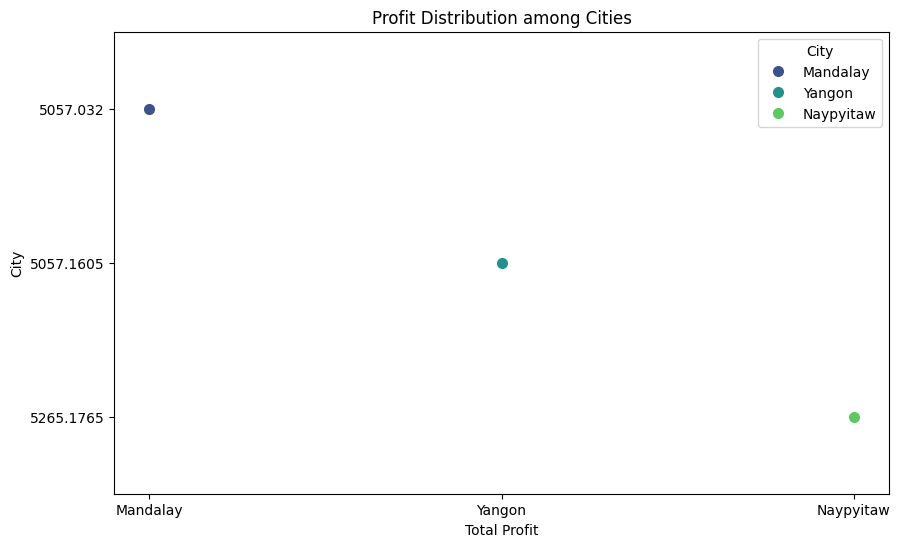

In [122]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='City', y='gross income', hue = 'City',data=profit, palette='viridis', orient='h', size=8, jitter=True)

# Setting chart title and labels
plt.title('Profit Distribution among Cities')
plt.xlabel('Total Profit')
plt.ylabel('City')

plt.show()

Insights :- Naypyitaw city stands out for generating higher profits in the dataset.

# Calculating the total revenue like total amount generated and total Sales like total quantity of products sold per each Product Line

# Group by 'Product line' and calculate summary statistics

In [130]:
product_line_summary = market_df.groupby('Product line').agg({
    'Total amount': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Display the summary statistics for each product line
print("Summary statistics for each product line:")
print(product_line_summary)

Summary statistics for each product line:
             Product line  Total amount  Quantity
0  Electronic accessories    54337.5315       971
1     Fashion accessories    54305.8950       902
2      Food and beverages    56144.8440       952
3       Health and beauty    49193.7390       854
4      Home and lifestyle    53861.9130       911
5       Sports and travel    55122.8265       920


In [138]:
revenue= market_df.groupby('Product line')['Total amount'].sum().reset_index()
revenue

,Product line,Total amount
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
2,Food and beverages,56144.8440
3,Health and beauty,49193.7390
4,Home and lifestyle,53861.9130
5,Sports and travel,55122.8265


# Total Revenue generated by each Product

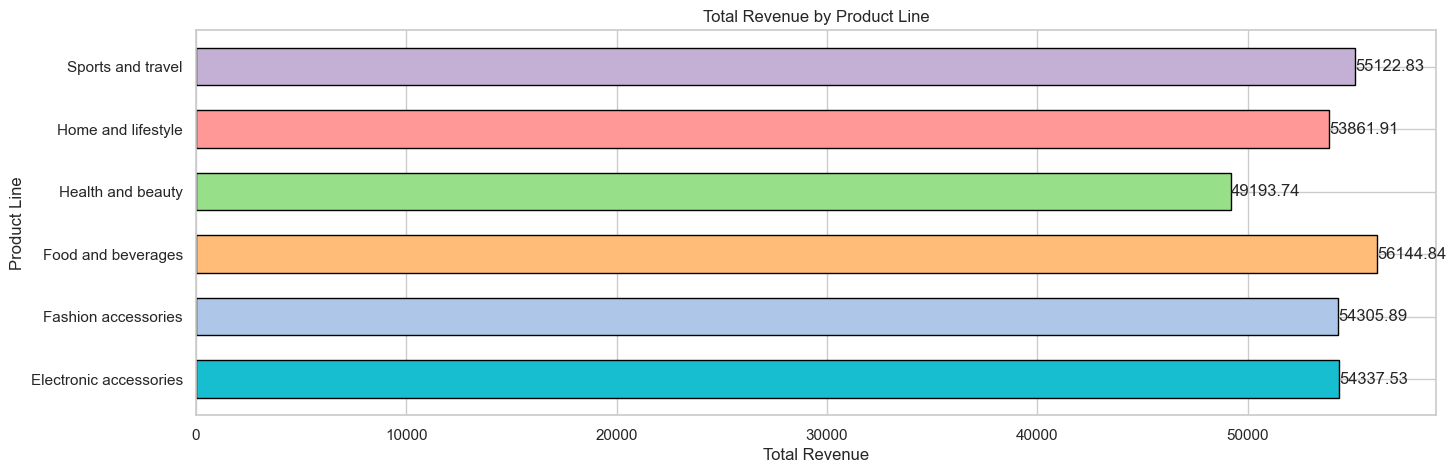

In [287]:
plt.figure(figsize=(16, 5))

# Creating a horizontal bar plot
color = ["#17becf","#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5"]
plt.barh(y='Product line', width='Total amount', data=product_line_summary, color=color, edgecolor='black', height=0.6)

# Add labels and title
plt.xlabel('Total Revenue')
plt.ylabel('Product Line')
plt.title('Total Revenue by Product Line')

# Display the values on the bars
for index, value in enumerate(product_line_summary['Total amount']):
    plt.text(value, index, f'{value:.2f}', va='center')

# Show the plot
plt.show()

Insights :- Food and Beverages, along with Sports and Travel, stand out as the primary contributors to gross income in the sales data

# Total Quantity sold per each Product

In [288]:
sales = market_df.groupby('Product line')['Quantity'].sum().reset_index()
sales

,Product line,Quantity
0,Electronic accessories,971
1,Fashion accessories,902
2,Food and beverages,952
3,Health and beauty,854
4,Home and lifestyle,911
5,Sports and travel,920


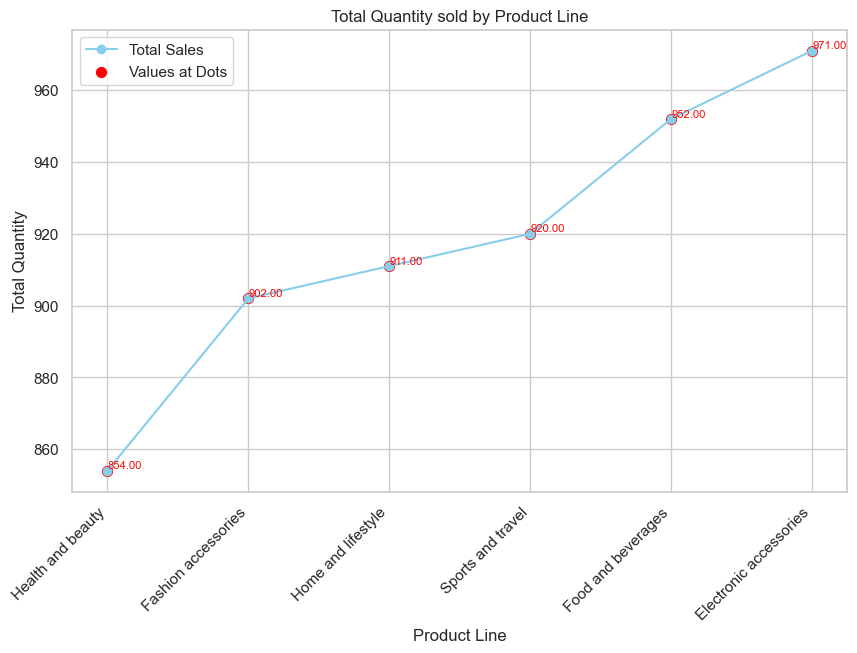

In [291]:
sales = sales.sort_values(by='Quantity', ascending=True)

# Plotting a line plot with markers
plt.figure(figsize=(10, 6))
plt.plot(sales['Product line'], sales['Quantity'], marker='o', color='skyblue', linestyle='-', label='Total Sales')
plt.scatter(sales['Product line'], sales['Quantity'], color='red', s=50, label='Values at Dots')

# Add labels and title
plt.xlabel('Product Line')
plt.ylabel('Total Quantity')
plt.title('Total Quantity sold by Product Line')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display values at dots
for x, y in zip(sales['Product line'], sales['Quantity']):
    plt.text(x, y, f'{y:.2f}', ha='left', va='bottom', fontsize=8, color='red')
    
plt.legend()

# Show the plot
plt.show()

Insights :- The sales data reveals that Electronic Accessories and Food and Beverages are the top-performing product lines, demonstrating higher sales compared to other categories.

# Gross income generated per each product line like which product line is generating more profit

In [181]:
profit = market_df.groupby('Product line')['gross income'].sum().reset_index()
profit

,Product line,gross income
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
2,Food and beverages,2673.5640
3,Health and beauty,2342.5590
4,Home and lifestyle,2564.8530
5,Sports and travel,2624.8965


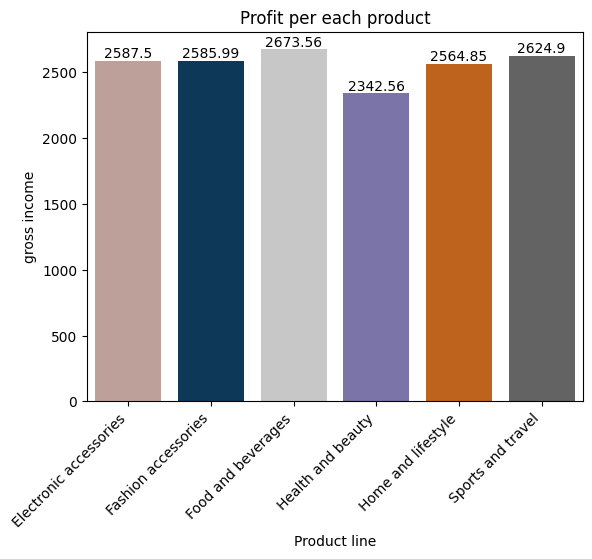

In [186]:
color = ["#c49c94", "#013a63", "#c7c7c7","#756bb1", "#d95f02", "#636363"]
ax = sns.barplot(x='Product line', y='gross income', hue = 'Product line',data=profit,palette = color)
plt.title('Profit per each product')
for bars in ax.containers:
    ax.bar_label(bars)
    
# Showing the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Insights :- Food and beverages and sports and travel is generating more profit 

# which product line has the good or better rating like food and beverages had the good rating

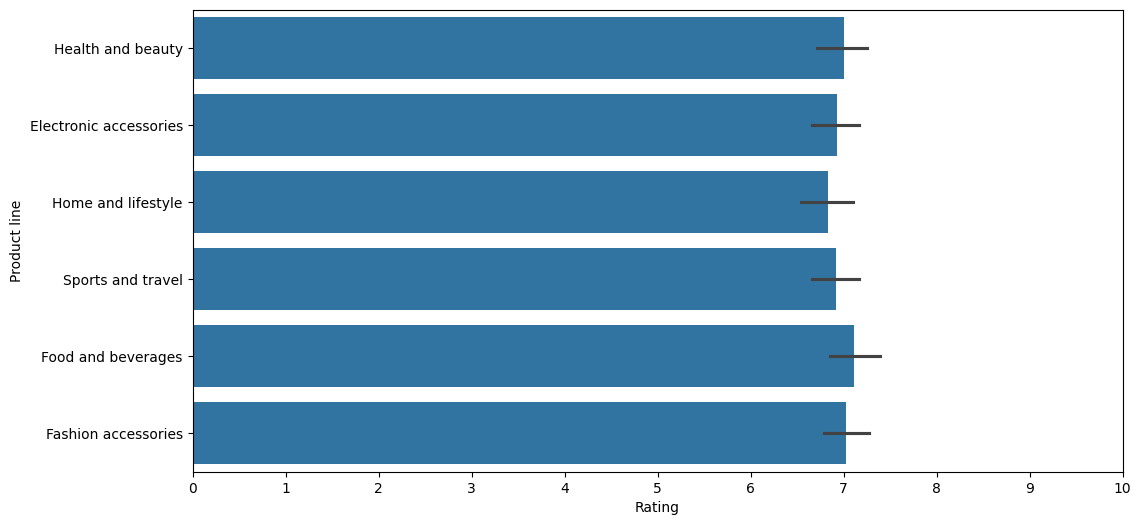

In [190]:
xdata = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

plt.figure(figsize=(12, 6))
sns.barplot(y=market_df['Product line'], x=market_df['Rating'])

# Set x-axis ticks and labels
plt.xticks(xdata)
plt.xlabel('Rating')

# Show the plot
plt.show()

# Calculating the total revenue like total amount generated and total Sales like total quantity of products sold per each Gender

In [151]:
market_df['Gender'].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

In [152]:
# Group by 'Gender' and calculate 
gender_analysis = market_df.groupby('Gender').agg({
    'Total amount': 'sum',
    'Quantity': 'sum'
}).reset_index()
gender_analysis


,Gender,Total amount,Quantity
0,Female,167882.925,2869
1,Male,155083.824,2641


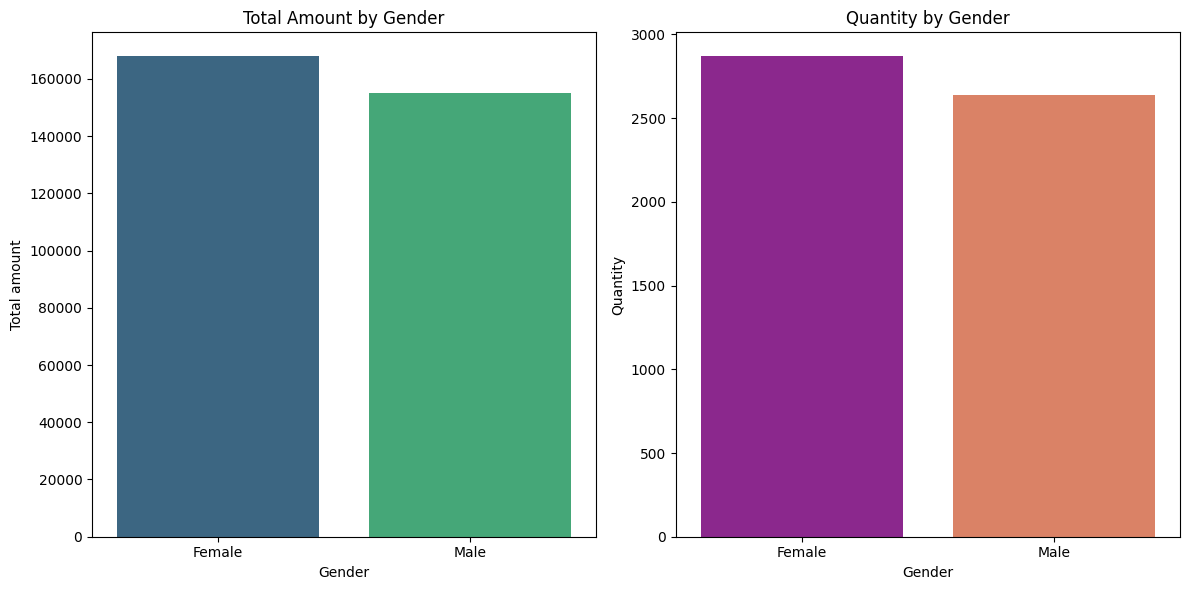

In [168]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x='Gender', y='Total amount', data=gender_analysis, hue ='Gender', palette='viridis', ax=axes[0])
axes[0].set_title('Total Amount by Gender')

sns.barplot(x='Gender', y='Quantity', data=gender_analysis,hue ='Gender', palette='plasma', ax=axes[1])
axes[1].set_title('Quantity by Gender')
plt.tight_layout()

# Show the plots
plt.show()

Insights :- Females contribute more significantly to both income generation and order volume

# Total Count of each Gender for every payment mode

In [171]:
count_data = market_df.groupby(['Gender', 'Payment']).size().reset_index(name='Count')
count_data

,Gender,Payment,Count
0,Female,Cash,178
1,Female,Credit card,163
2,Female,Ewallet,160
3,Male,Cash,166
4,Male,Credit card,148
5,Male,Ewallet,185


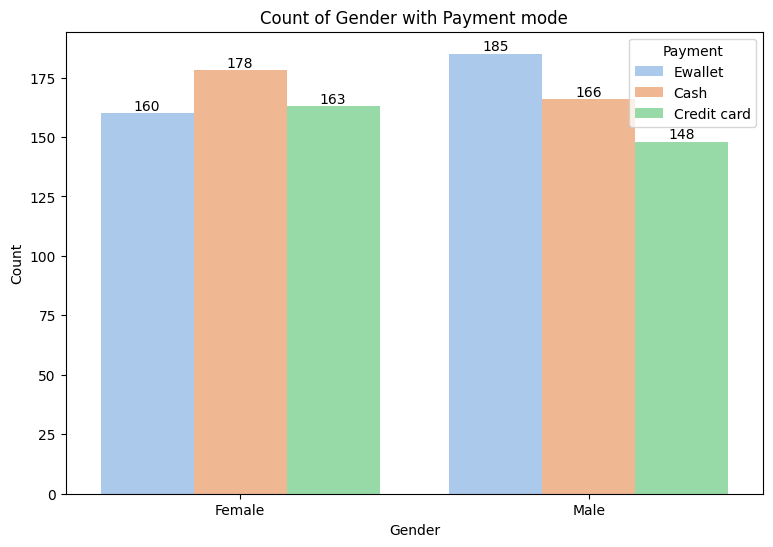

In [172]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Gender', hue='Payment',legend = True, data=market_df, palette='pastel')

# Set plot title and labels
plt.title('Count of Gender with Payment mode')
plt.xlabel('Gender')
plt.ylabel('Count')

for bars in ax.containers:
    ax.bar_label(bars)
# Show the plot
plt.show()

Insights :- Females predominantly choose cash as their payment method, while males prefer Ewallet for transactions.

# A bar plot that shows the products purchased by females sns.countplot() function with 'Product line' on the x-axis and set the 'hue' parameter to 'Gender'.  This will create a bar plot where each bar represents the count of products purchased by females and males in each product line.

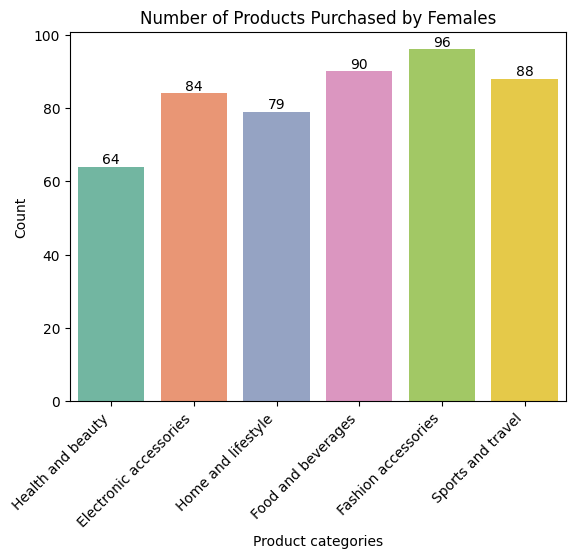

In [179]:
# Filtering the DataFrame for female customers
female_df = market_df[market_df['Gender'] == 'Female']

# Creating a count plot for 'Product line' 
ax = sns.countplot( data=female_df, x='Product line', hue = 'Product line',legend = False, palette='Set2')

# Set plot title and labels
plt.title('Number of Products Purchased by Females')
plt.xlabel('Product categories')
plt.ylabel('Count')

for bars in ax.containers:
    ax.bar_label(bars)

# Showing the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Insights :- Females exhibit a higher purchasing trend in the Fashion and Accessories product line.

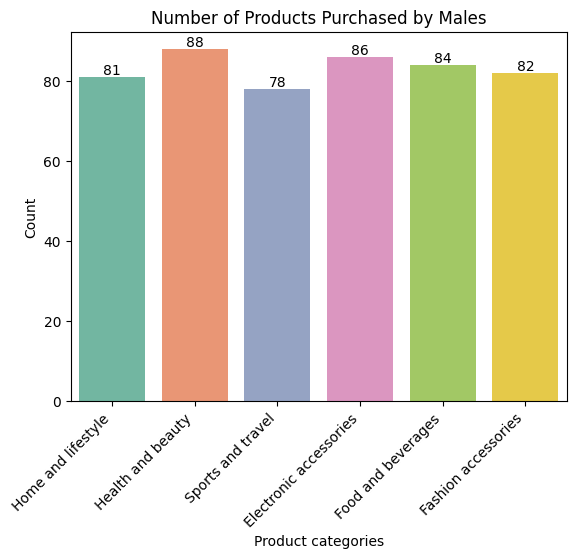

In [178]:
# Filtering the DataFrame for female customers
male_df = market_df[market_df['Gender'] == 'Male']

# Creating a count plot for 'Product line' 
ax = sns.countplot( data=male_df, x='Product line', hue = 'Product line',legend = False, palette='Set2')

# Set plot title and labels
plt.title('Number of Products Purchased by Males')
plt.xlabel('Product categories')
plt.ylabel('Count')

for bars in ax.containers:
    ax.bar_label(bars)

# Showing the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Insights :- Males exhibit a higher purchasing trend in the Health and Beauty and Electronic accessories product line.

# Overall Gross income for each payment method

In [213]:
overall_gross_income_by_payment = market_df.groupby('Payment')['gross income'].sum().reset_index()
overall_gross_income_by_payment 

,Payment,gross income
0,Cash,5343.170
1,Credit card,4798.432
2,Ewallet,5237.767


# So with cash and ewallet the profit is more

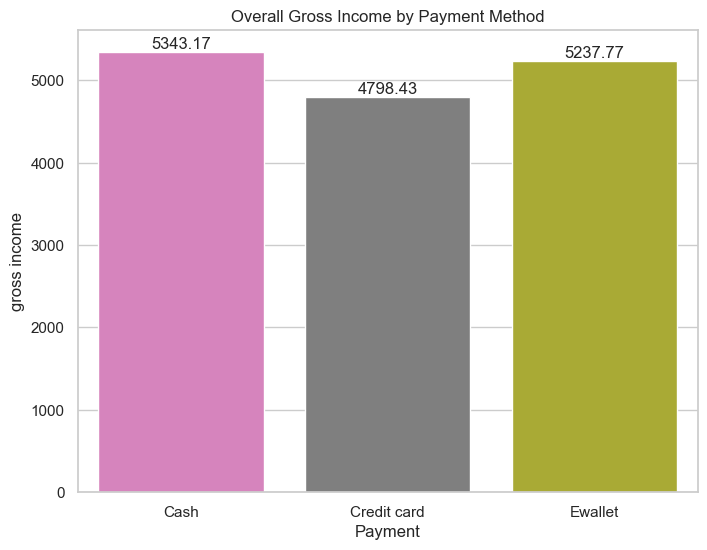

In [235]:
plt.figure(figsize=(8, 6))
color = ["#e377c2", "#7f7f7f", "#bcbd22"]
ax = sns.barplot(x='Payment', y='gross income', hue = 'Payment',data=overall_gross_income_by_payment,palette = color)
plt.title('Overall Gross Income by Payment Method')
for bars in ax.containers:
    ax.bar_label(bars)

# The average quantity of products purchased by members and non-members 

In [223]:
avg_quantity_by_customer_type = market_df.groupby('Customer type')['Quantity'].mean().reset_index()
avg_quantity_by_customer_type 

,Customer type,Quantity
0,Member,5.558882
1,Normal,5.460922


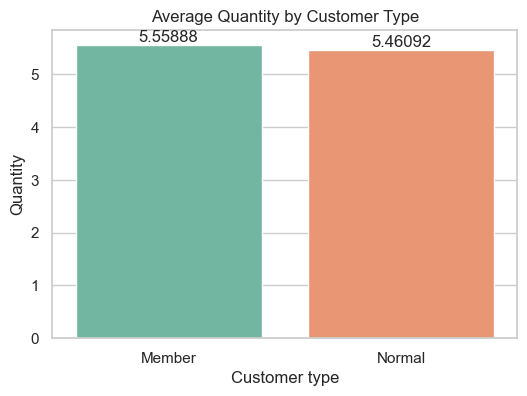

In [234]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Customer type', y='Quantity', hue = 'Customer type',data=avg_quantity_by_customer_type ,palette = "Set2")
plt.title('Average Quantity by Customer Type')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

Insights :- The average number of products purchased is higher for customers with a 'Member' customer type

# Gross margin percentage vary across different product lines

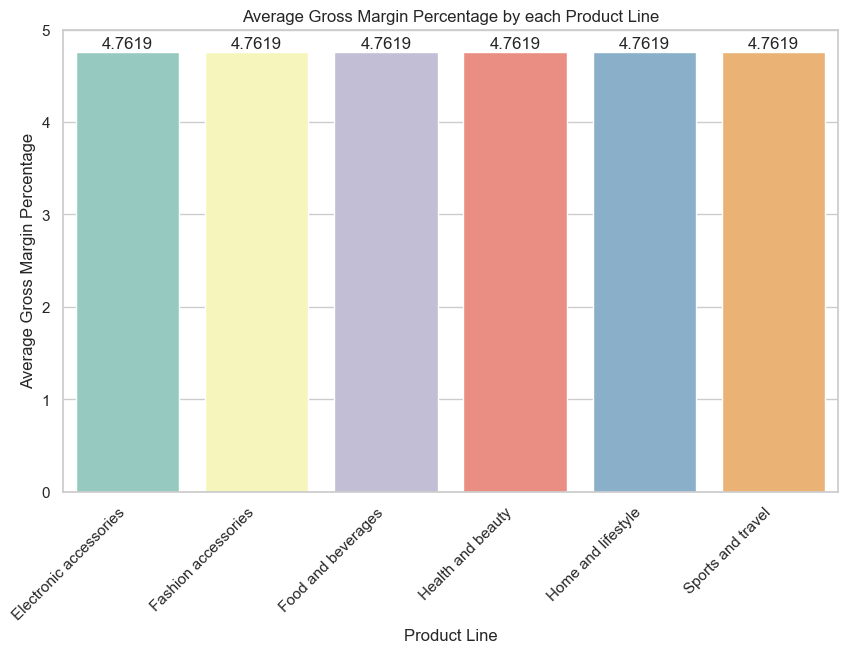

In [250]:
avg_gross_margin_by_product_line = market_df.groupby('Product line')['gross margin percentage'].mean()

plt.figure(figsize=(10, 6))
ax  = sns.barplot(x=avg_gross_margin_by_product_line.index, y=avg_gross_margin_by_product_line.values, hue = avg_gross_margin_by_product_line.index,palette = 'Set3')
plt.title('Average Gross Margin Percentage by each Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Gross Margin Percentage')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Relationship between the Rating category and the Total amount spent

C:\Users\PC\AppData\Local\Temp\ipykernel_12652\802302759.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_total_amount_by_rating_category = market_df.groupby('Rating Category')['Total amount'].sum()


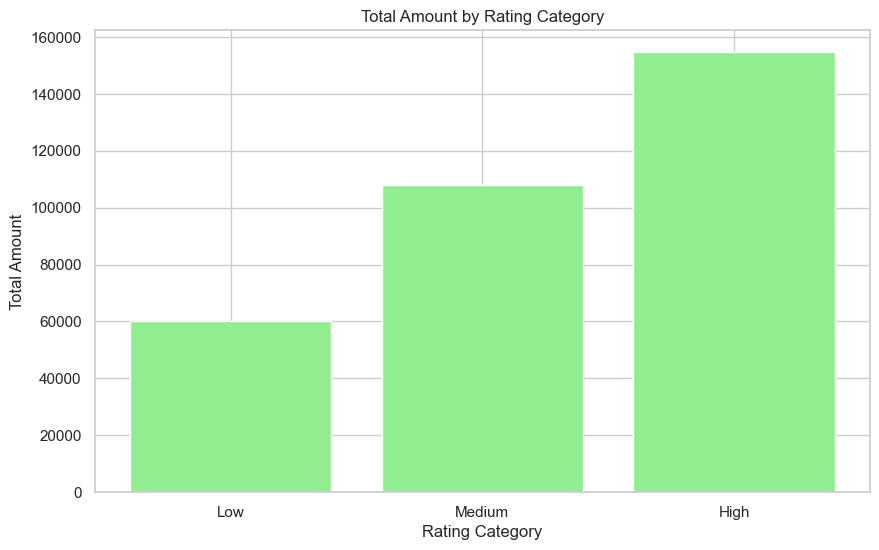

In [263]:
avg_total_amount_by_rating_category = market_df.groupby('Rating Category')['Total amount'].sum()

plt.figure(figsize=(10, 6))
plt.bar(avg_total_amount_by_rating_category.index, avg_total_amount_by_rating_category.values, color='lightgreen')
plt.title('Total Amount by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Total Amount')
plt.show()

Insights :- we may identify patterns or trends in spending behavior based on the assigned rating categories. The oroducts which have higher rating has given higher revenue.

# Cost of goods sold for each product line

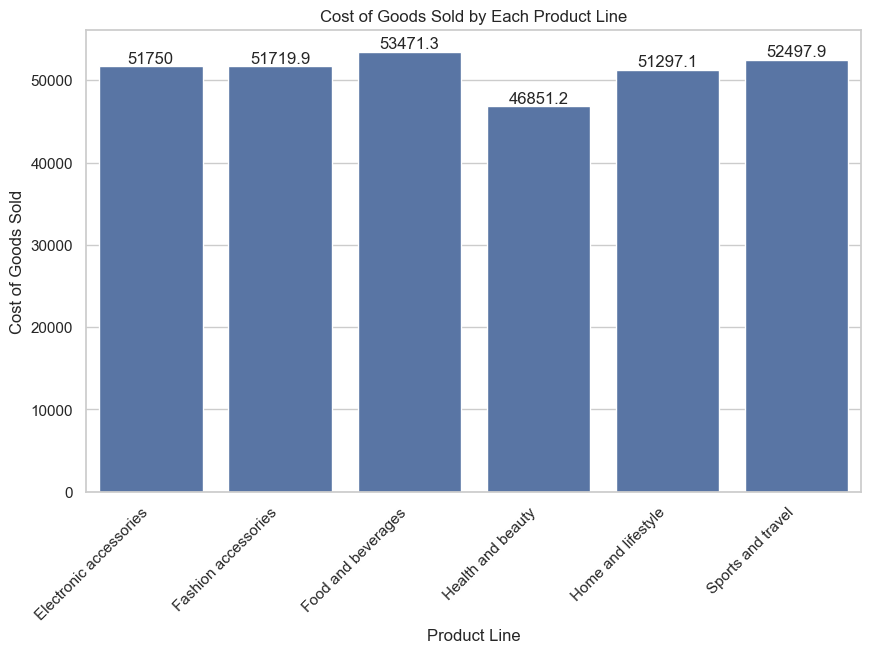

In [270]:
avg_cogs_by_product_line = market_df.groupby('Product line')['cost of goods sold'].sum() 

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_cogs_by_product_line.index, y=avg_cogs_by_product_line.values)
plt.title('Cost of Goods Sold by Each Product Line')
plt.xlabel('Product Line')
plt.ylabel('Cost of Goods Sold')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


Insights :- The Food and Beverages product line incurs higher costs of goods sold compared to other product lines.

# Rating vs Quantity

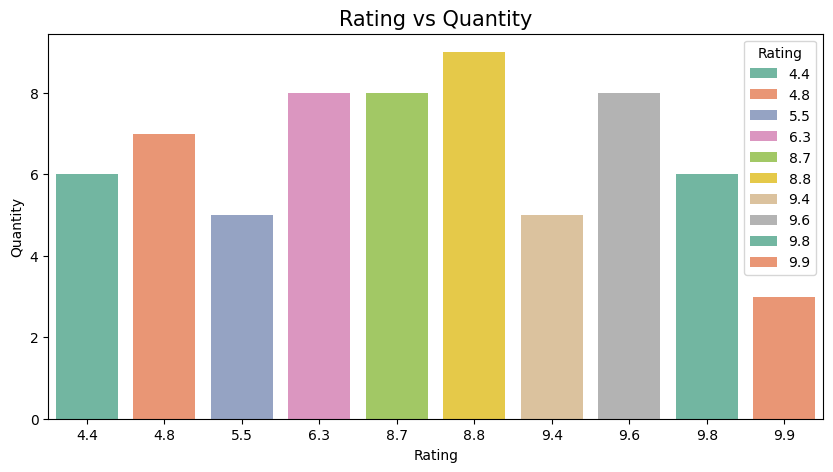

In [298]:
plt.figure(figsize=(10,5))
sns.barplot(x="Rating", y="Quantity", hue = 'Rating',data=market_df[170:180],palette = 'Set2')
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

In [ ]:
Insights :- Products with a rating of 8.8 have experienced higher sales compared to other rating values.

# Inference from the Analysis

Total Customers = 1000
Total Females = 501
Total Males = 499
Min Rating = 4
Max Rating = 10
Average Rating = 6.97
Best Average Rating in Food & Beverages
Maximum People pays through e-wallet
Maximum people comes from Yangon City
Max Sales of Fashion Accessories is from Females
Max Sales of Health & Beauty is from Males

# Conclusion

1. Recognizing the success of Branch C in income generation, the supermarket could analyze the factors contributing to this success and consider implementing successful strategies in other branches.

2. Leveraging the popularity of Electronic Accessories and Food and Beverages, the supermarket can strategically promote and enhance these product lines to capitalize on customer preferences.

3. Acknowledging differences in payment preferences across branches, the supermarket could optimize payment methods based on branch-specific patterns. For example, promoting Ewallet usage in branches where it's less prevalent or streamlining cash transactions in branches where it's preferred.

4. With Naypyitaw leading in revenue and ratings and Yangon excelling in order quantity, the supermarket could implement city-specific marketing campaigns to further engage customers and boost sales in each location.

5. Addressing the higher cost of goods sold in the Food and Beverages product line, the supermarket could explore cost-saving measures without compromising product quality to maintain profitability.

6. Acknowledging gender-specific trends in purchasing behavior and payment methods, the supermarket can tailor marketing strategies to cater to the preferences of both male and female customers.

7. Recognizing that females generate more income and orders, the supermarket could tailor marketing strategies to better cater to the preferences of female customers.

8. Building on the insight that products with higher ratings result in higher revenue, the supermarket can focus on promoting and featuring high-rated products prominently.